##  EDA : Let's check out the data  

In [277]:
import Beer
from BeerScraper import create_data
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from bs4 import BeautifulSoup
import requests
import re
import nltk

pd.set_option('max_colwidth', 300)

df = pd.read_csv('beer.csv', header='infer')
df_copy = df  #save a copy of dataframe for reference.  don't change this copy
df.head()

,name,brewery,style,rating,review
0,Big Rock Ale,Big Rock Brewery,Scottish Ale,3.90,"smell  soft hop aroma with significant malt scents. this one smells very creamy. taste  and creamy it is. the traditional irish flavors come out at the tongue. this is creamy, not like a cream ale, but close. the malt is big, buttery, and very smooth. the hops are very unique. this is not a sh..."
1,Flip Ale,Dogfish Head Craft Brewery,Old Ale,4.08,on tap at dfh rehoboth... collab with eatily... cardamom and red wine must. golden orange. .no head. typical dfh yeast aroma. ..some spice and maybe a belgian influence. sweet spicy and somewhat fruity.. not much old ale characteristic. too light for that. its still tasty. the cardamom does add...
2,The Almond Marzen Project - Beer Camp #26,Sierra Nevada Brewing Co.,Märzen / Oktoberfest,3.78,"nice auburn impressions, tons of clarity, solid inch of off white head. aroma was a little bit sweet and nutty. taste gave a little more sweetness, stayed away from hops and bitterness, relatively light bodied. nothing almond came out of it that was obvious. kind of a fancied up oktoberfest ..."
3,Perpetual Burn IPA,Rock Bottom Restaurant & Brewery,American IPA,3.88,"s - piney, a little cat piss in a good way, skunky bud. t - some caramel front, tons of hops at the finish. m - medium body, a little too sharp and unbalanced for me. d - very sessionable considering the hops and abv."
4,Hop Monster DRIPA,Iron Hill Brewery & Restaurant,American Double / Imperial IPA,4.14,"double red ipa, full-bodied rich caramel malt character with a generous amount of american hops. beware the monster! a: this was a clear, amber tinted copper color. it was served to me with a firm, frothy cap. s: sugar cookie/short bread malts with a little honey and a very strong blast of tro..."


In [274]:
# print the text of the first review:
print(df['review'][0])

smell  soft hop aroma with significant malt scents. this one smells very creamy. taste  and creamy it is. the traditional irish flavors come out at the tongue. this is creamy, not like a cream ale, but close. the malt is big, buttery, and very smooth. the hops are very unique. this is not a sharp hop flavor. this is an easy, saturated, well-mixed blend that plays a complimenting second fiddle to the malt base. no sweetness. the finish is nutty and big. this ale changes personalities at the end. mouthfeel  lightly carbonated and exceptionally smooth and creamy. drinkability  very creamy. i know that im repeating myself, but this ale is creamy like peanut butter. its actually kind of nutty to boot. creamy. 


###  REVIEWS: how many ratings have a review with words?  
Review is the text to describe the beer.  I need reviews with words.  
22% of reviews are blank.  About 10% are 1-10 characters long,  
About half of reviews are < 100 words.  

  blank reviews: 12,066
verbose reviews: 43,177
  total reviews: 55,243
blank reviews are 21.84% out of 55243 observations

CHART: top bar shows blank reviews, lower bar shows verbose reviews


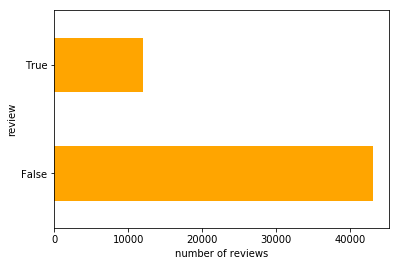

In [317]:
#look at the proportion of reviews without text/ or with text

import matplotlib.pyplot as plt
b = df.groupby([df['review']==' ']).size()
print('  blank reviews:', format(sum(df.review==' '), ',d'))
print('verbose reviews:', format(sum(df.review!=' '), ',d'))
print('  total reviews:', format(len(df), ',d'))
print("blank reviews are {:.2f}% out of {} observations".format(100* b[1]/(b[1]+b[0]), b[1]+b[0]))

%matplotlib inline
print('')
print('CHART: top bar shows blank reviews, lower bar shows verbose reviews')

_= blank_reviews.plot(kind='barh', color='orange')
_= plt.xlabel('number of reviews')
plt.show()

In [344]:
max(df.review_length)

21365

12066
5181
1661
1001
555


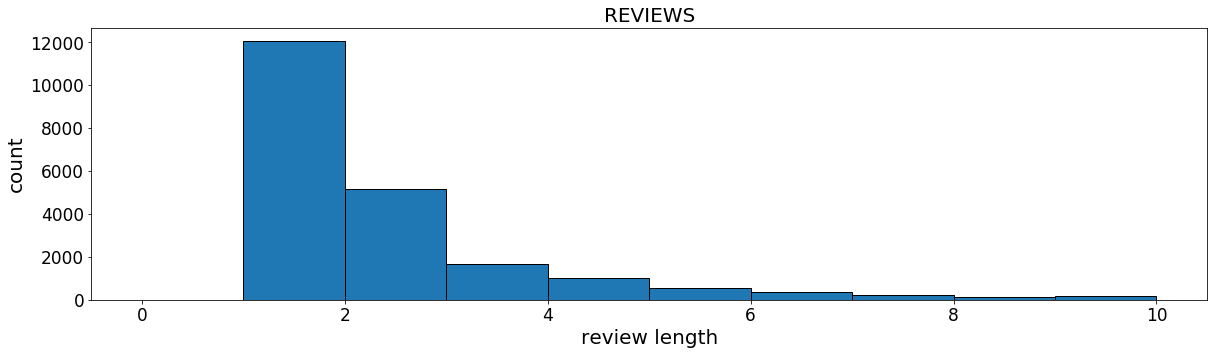

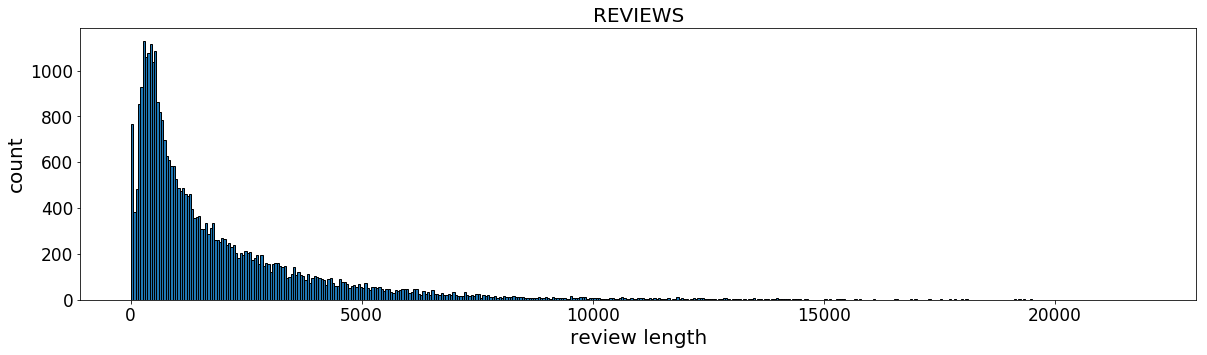

In [352]:
# review length distribution.  
# 
import matplotlib.pyplot as plt

# add a column that measures length of 'review'
df['review_length'] = df['review'].str.len()
print(sum(df['review_length']==1))
print(sum(df['review_length']==2))
print(sum(df['review_length']==3))
print(sum(df['review_length']==4))
print(sum(df['review_length']==5))

bins= np.arange(0,11,1)  
_= plt.figure(figsize=(20,5))
_= plt.hist(df['review_length'], bins=bins, edgecolor="k")
_= plt.xticks(size=17)
_= plt.yticks(size=17)
_= plt.title('REVIEWS', size=20)
_= plt.xlabel('review length', size=20)
_= plt.ylabel('count', size=20)
plt.show()

bins= np.arange(11,22000,50)  
_= plt.figure(figsize=(20,5))
_= plt.hist(df['review_length'], bins=bins, edgecolor="k")
_= plt.xticks(size=17)
_= plt.yticks(size=17)
_= plt.title('REVIEWS', size=20)
_= plt.xlabel('review length', size=20)
_= plt.ylabel('count', size=20)
plt.show()


In [370]:
short_reviews.head()

,name,brewery,style,rating,review,review_length
7,Comet Dust,Equinox Brewing Company,American Pale Wheat Ale,3.00,,1
9,Wild Gift,Burning Sky Brewery,Berliner Weissbier,3.66,,3
10,UncALT Four Altbier,Call to Arms Brewing Company,Altbier,3.41,,1
13,Summer In Germany,Bosque Brewing Co.,Kölsch,3.51,,1
14,Murk Du Soleil,The Marble Arch,American Double / Imperial IPA,4.12,,1


In [380]:
short_reviews = df[df['review'].str.len()<20]
print(len(short_reviews))
print(type(short_reviews))
full = ''
for r in short_reviews['review']:
    full = full + r
print(full)

21648
<class 'pandas.core.frame.DataFrame'>
                                                                                                                                                                                                                                                                                                                                                                                               4/4.25/4.25/4/4.25                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     eric                                                                  

### STYLES: count how many styles, and how many reviews of each style  
Counting styles revealed several things:  
First, 104 styles is a big number!  I would have guessed fewer.  
I confirmed on the BA.com site; they list 104 beer styles.
Secondly, some had NaN count.  Scanning the names, they all appear to be uncommon styles.  My random scraping did not find any of these.
Next, many styles had only 1 review.  Some had very few reviews.  
I won't be able to analyze these beers.  
But the majority of styles had over 200 reviews per style.  
(Some style names seem similar, such as American IPA and Imperial IPA and English IPA.  I might want to combine them.)  
American IPA, with 6706/55,243 reviews is far and away the most popular!  

number of styles reviewed: 104


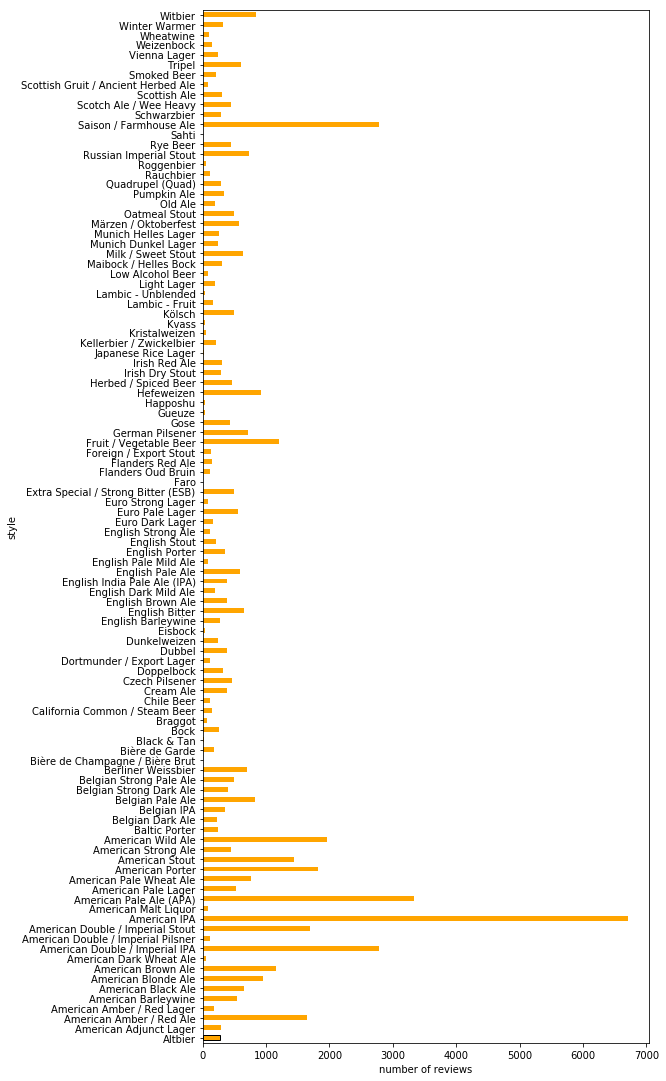

In [265]:
# how many STYLES are represented

styles = df.groupby(['style']).size()  
print('number of styles reviewed:',len(styles))
_= plt.figure(figsize=(8,19))
_= styles.plot(kind='barh', color='orange', edgecolor="k")
_= plt.xlabel('number of reviews')
plt.show()

In [266]:
print(styles[styles>200].count())
print(styles[styles>200])

67
style
Altbier                                 269
American Adjunct Lager                  290
American Amber / Red Ale               1642
American Barleywine                     549
American Black Ale                      653
American Blonde Ale                     961
American Brown Ale                     1159
American Double / Imperial IPA         2785
American Double / Imperial Stout       1689
American IPA                           6706
American Pale Ale (APA)                3341
American Pale Lager                     531
American Pale Wheat Ale                 760
American Porter                        1821
American Stout                         1437
American Strong Ale                     448
American Wild Ale                      1959
Baltic Porter                           243
Belgian Dark Ale                        233
Belgian IPA                             359
Belgian Pale Ale                        823
Belgian Strong Dark Ale                 404
Belgian Strong Pale Ale

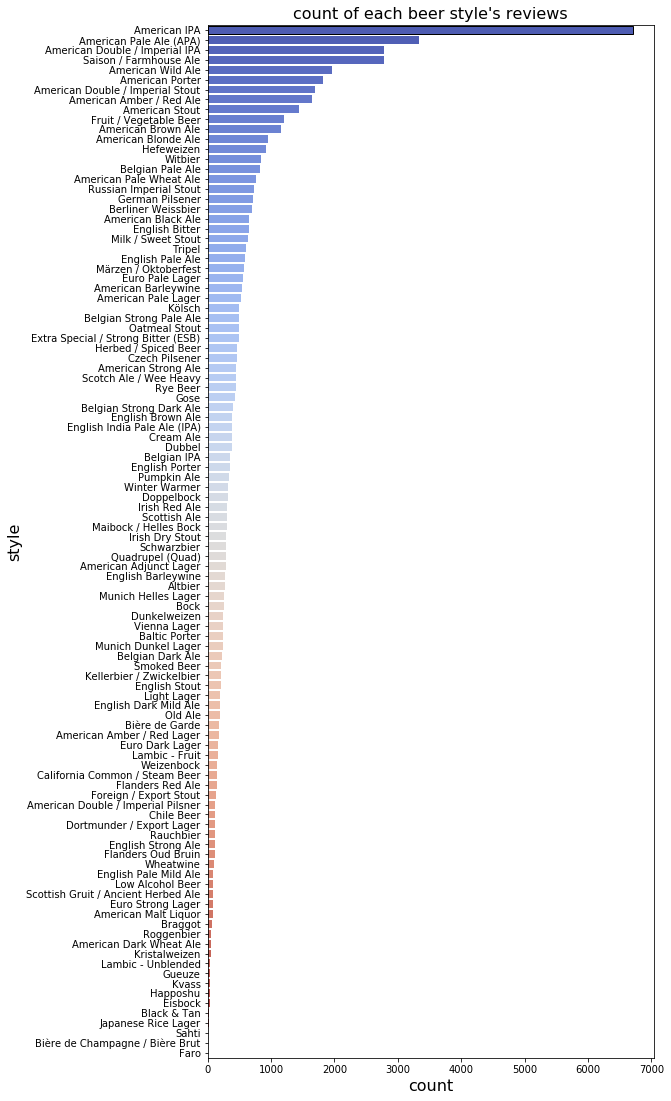

In [269]:
import seaborn as sns
styles = pd.DataFrame()
labels = df.groupby(['style']).size() 
styles['count'] = labels
styles['style'] = labels.index
styles = styles.sort_values(by='count', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(8,19)
sns.barplot(x='count', y='style', data=styles, ax=ax, palette="coolwarm", edgecolor="k")
plt.title("count of each beer style's reviews", size=16)
plt.ylabel('style', size=16)
plt.xlabel('count', size=16)
plt.show()

number of styles reviewed: 104


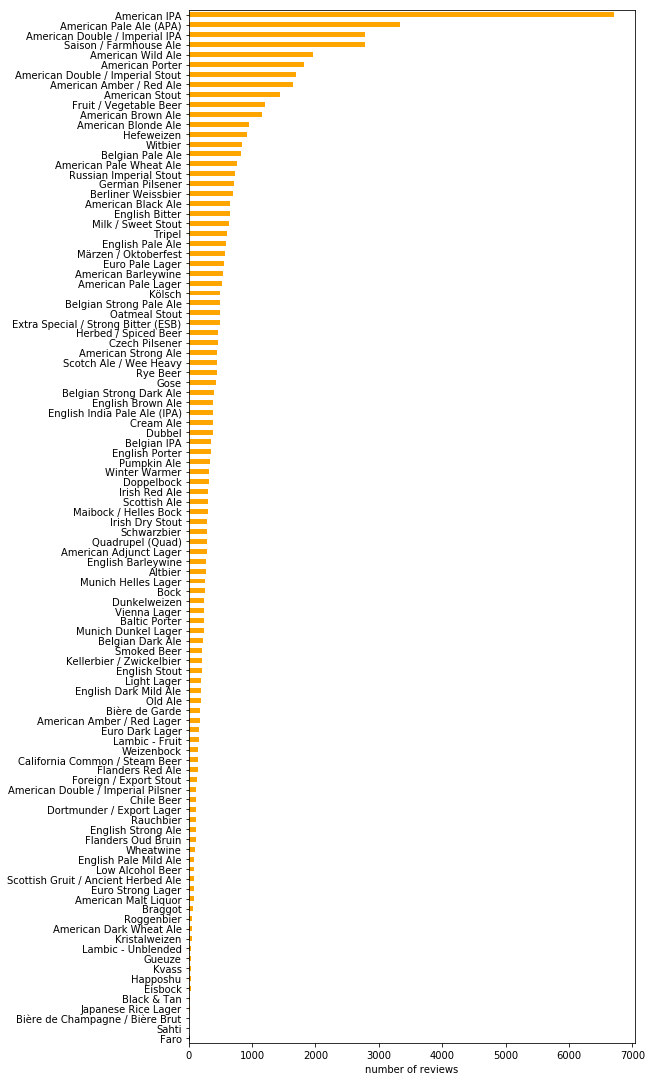

In [270]:
s = df['style'].value_counts(ascending=True)
print('number of styles reviewed:', len(s))
_= plt.figure(figsize=(8,19))
_= s.plot(kind='barh', color='orange', edgecolor="k")
_= plt.xlabel('number of reviews')
plt.show()

### RATINGS distribution  
Beers are rated on a scale of 1 to 5.  Ratings are averaged, so a rating can be anywhere in between.  
Check that no ratings exist >5 or <1.  
Plot a chart to see its shape.

In [271]:
print('mean rating: {:.2f}'.format(df.rating.mean()))
print('standard deviation: {:.4f}'.format(df.rating.std()))
print('median rating:', df.rating.median())
print('lowest rating:', df.rating.min())
print('highest rating:', df.rating.max())

mean rating: 3.73
standard deviation: 0.4569
median rating: 3.79
lowest rating: 1.0
highest rating: 5.0


In [ ]:
#   this is from danielhnyk.cz : overlay a normal distribution curve

# create some normal random noisy data
ser = 50*np.random.rand() * np.random.normal(10, 10, 100) + 20

# plot normed histogram
plt.hist(ser, normed=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ser))

# lets try the normal distribution first
m, s = stats.norm.fit(ser) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it

# exactly same as above
ag,bg,cg = stats.gamma.fit(ser)  
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma, label="Gamma")

# guess what :) 
ab,bb,cb,db = stats.beta.fit(ser)  
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
plt.plot(lnspc, pdf_beta, label="Beta")

plt.show()  

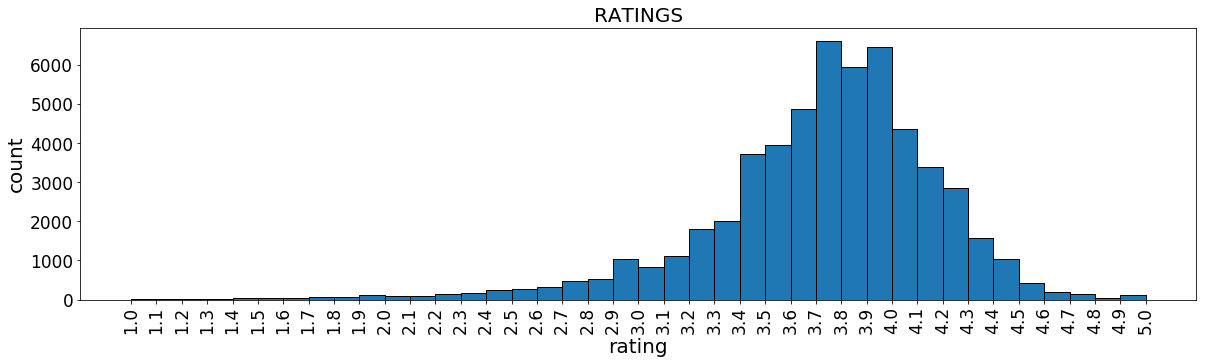

In [272]:
# ratings distribution.  
import matplotlib.pyplot as plt
import seaborn as sns

bins= np.arange(1,5.1,0.1)   # bins from 1 to 5, increments of 0.1
_= plt.figure(figsize=(20,5))
_= plt.hist(df['rating'], bins=bins, edgecolor="k") #
_= plt.xticks(bins, rotation='vertical',size=17)
_= plt.yticks(size=17)
_= plt.title('RATINGS', size=20)
_= plt.xlabel('rating', size=20)
_= plt.ylabel('count', size=20)

plt.show()

### BREWERIES  
count number of reviews from each brewery  
I don't know if brewery will be significant.  
Rock Bottom and Tired Hands had over 200 reviews each!  (and I've never heard of them.)  
The majority had 1 review.  

In [273]:
# examine distribution of brewerits

breweries = df.brewery.value_counts()
print('number of breweries reviewed:',len(breweries))
print('breweries with only 1 review:',sum(breweries==1))
print('breweries with 2 or 3 reviews:', sum(breweries==2)+sum(breweries==3))
print('')
print(breweries[breweries>70])


number of breweries reviewed: 9752
breweries with only 1 review: 2879
breweries with 2 or 3 reviews: 2826

Rock Bottom Restaurant & Brewery         274
Tired Hands Brewing Company              218
Cigar City Brewing                       197
Mikkeller ApS                            152
Iron Hill Brewery & Restaurant           148
Goose Island Beer Co.                    147
The Bruery                               127
Pizza Port Solana Beach                  123
Imperial Oak Brewing                     120
Stone Brewing                            115
Sierra Nevada Brewing Co.                107
Minneapolis Town Hall Brewery            107
Dogfish Head Craft Brewery                94
Founders Brewing Company                  94
Short's Brewing Company                   92
Ballast Point Brewing Company             91
Captain Lawrence Brewing Co.              91
Jackie O's Pub & Brewery                  90
Al's of Hampden / Pizza Boy Brewing       90
Wicked Weed Brewing                   

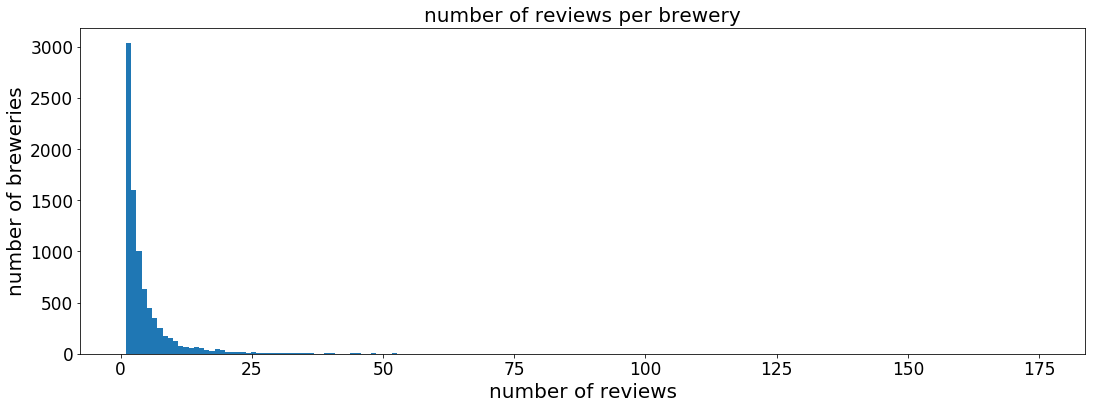

In [242]:
#_= breweries.hist(bins=175)
_= plt.figure(figsize=(18,6))
_= plt.hist(breweries, bins=175)
_= plt.xticks(size=17)
_= plt.yticks(size=17)
_= plt.title('number of reviews per brewery', size=20)
_= plt.xlabel('number of reviews', size=20)
_= plt.ylabel('number of breweries', size=20)
plt.show()

### NAMES  
The name might not matter, but let's look anyway.  
Some have very short names, some of which are errors.  

In [393]:
short_names = df[df['name'].str.len()<4]
print(len(short_names))
print(type(short_names))
full = ''
for n in short_names['name']:
    full = full + n + ' '
print(full)

353
<class 'pandas.core.frame.DataFrame'>
TPA WPA Dig IPA ESB ESB SSS ESB ESB 6IX IPA ESB 26° Eis 15 IPA War Due BRU ESB Nüa Te Job IPA IPA IPA ESB IPA IPA IPA IPL IPA IPA 16 Wax One H2 KP 6 FAO IPA IPA ESB CLT 484 IPA 2IC C-4 Amy ESB ALT ESB IPA Oi Red NWA PDT OM Eve Bae Red Tux IPA 001 Glo IPA IPA POD ESB IPA IBA Ava Ann IPA IPL Id Wit ESB ESB III IPA IPA 12° IPA Ale OG One IPA Vor MO IPA IPA IPA IPA IPA IPA ESB IPA 710 TCM Eva MSB H3 ESB M CCC 360 331 CO2 IPA IPA IPA APA ESB IPA Red EPA V6 IPA ESB Hex IPA XPA ESB Alt Wor 3S IPA Red Vit IPA IPA IPA Alt H2 ESB Vos Alt Hey B Ale 26° PCP IPA Alt IPA IPA APA IPA ALT ESB Wit SRV IRA 724 ESB BAT POG ! IPL IPA Ale NWA L IPA IPA IPA 4 IPA ESB XXV IPA D Nut ESB S23 PSA IPA IPK IPK LSD Rot IPA DTF IPA IPA IPA IPA ESB IPA IPA Gui ESB 484 ESB BÁN #69 IPA IPA Edo IPA ESB Maz Mel SSR Joy IPA Hef idl ESB IPA APA IP1 Syl KSA PMX #9 ESB ESB TBA 484 JPA Ava APA Red IPA ESB ESB RAD ESB GFF NWA Fog Rot IPA IPA 555 ESB IPA Ten IPA TKO 4GA 2x4 PG Ale XSA 

In [ ]:
# this is from another module.  Unlikely I'll use it, but I'll keep it around
def remove_punc(word):
    # Removes punctuation from a word
    return re.sub(r'[^\w\s]', '', word)

for i in range(len(df)):
    # split into list of words
    words = df['review'][i].split()  
    # Remove stopwords
    words = [word for word in words if word not in nltk.corpus.stopwords.words("english")]
    # Remove puncutation
    words = [remove_punc(word) for word in words]
    # Remove numbers
    words = [word for word in words if not word.isdigit()]
    # Remove some particular words that break things
    #words = [word for word in words if word not in ['name', 'style', 'brewery', 'rating', '']]
    df['words'][i] = words

In [46]:
df.head()

,name,brewery,style,rating,review,words
0,Big Rock Ale,Big Rock Brewery,Scottish Ale,3.90,"smell  soft hop aroma with significant malt scents. this one smells very creamy. taste  and creamy it is. the traditional irish flavors come out at the tongue. this is creamy, not like a cream ale, but close. the malt is big, buttery, and very smooth. the hops are very unique. this is not a sh...","[smell, , soft, hop, aroma, significant, malt, scents, one, smells, creamy, taste, , creamy, is, traditional, irish, flavors, come, tongue, creamy, like, cream, ale, close, malt, big, buttery, smooth, hops, unique, sharp, hop, flavor, easy, saturated, wellmixed, blend, plays, complimenting, seco..."
1,Flip Ale,Dogfish Head Craft Brewery,Old Ale,4.08,on tap at dfh rehoboth... collab with eatily... cardamom and red wine must. golden orange. .no head. typical dfh yeast aroma. ..some spice and maybe a belgian influence. sweet spicy and somewhat fruity.. not much old ale characteristic. too light for that. its still tasty. the cardamom does add...,"[tap, dfh, rehoboth, collab, eatily, cardamom, red, wine, must, golden, orange, no, head, typical, dfh, yeast, aroma, some, spice, maybe, belgian, influence, sweet, spicy, somewhat, fruity, much, old, ale, characteristic, light, that, still, tasty, cardamom, add, nice, flavor, still, kind, lacki..."
2,The Almond Marzen Project - Beer Camp #26,Sierra Nevada Brewing Co.,Märzen / Oktoberfest,3.78,"nice auburn impressions, tons of clarity, solid inch of off white head. aroma was a little bit sweet and nutty. taste gave a little more sweetness, stayed away from hops and bitterness, relatively light bodied. nothing almond came out of it that was obvious. kind of a fancied up oktoberfest ...","[nice, auburn, impressions, tons, clarity, solid, inch, white, head, aroma, little, bit, sweet, nutty, taste, gave, little, sweetness, stayed, away, hops, bitterness, relatively, light, bodied, nothing, almond, came, obvious, kind, fancied, oktoberfest, good, really, change, anything, use, almon..."
3,Perpetual Burn IPA,Rock Bottom Restaurant & Brewery,American IPA,3.88,"s - piney, a little cat piss in a good way, skunky bud. t - some caramel front, tons of hops at the finish. m - medium body, a little too sharp and unbalanced for me. d - very sessionable considering the hops and abv.","[, piney, little, cat, piss, good, way, skunky, bud, , caramel, front, tons, hops, finish, , medium, body, little, sharp, unbalanced, me, , sessionable, considering, hops, abv]"
4,Hop Monster DRIPA,Iron Hill Brewery & Restaurant,American Double / Imperial IPA,4.14,"double red ipa, full-bodied rich caramel malt character with a generous amount of american hops. beware the monster! a: this was a clear, amber tinted copper color. it was served to me with a firm, frothy cap. s: sugar cookie/short bread malts with a little honey and a very strong blast of tro...","[double, red, ipa, fullbodied, rich, caramel, malt, character, generous, amount, american, hops, beware, monster, a, clear, amber, tinted, copper, color, served, firm, frothy, cap, s, sugar, cookieshort, bread, malts, little, honey, strong, blast, tropical, fruit, hops, fresh, appealing, t, tons..."
